### Homework1

#### 1. Model Statement and Data Collection

The link to the dataset: https://www.kaggle.com/dragonheir/logistic-regression


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc
%matplotlib inline

##### The Dataset used in these models tells about whether a person of certain age having certain income purchases a product or not.
##### We need to predict whether a targeted audience will purchase the product or not.

In [3]:
social_dataset = pd.read_csv("Social_Network_Ads.csv")

#### Read the head of the dataset

In [4]:
social_dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


##### Read the tail of the dataset

In [5]:
social_dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


#### 2. Exploratory Data Analysis and Data Preprocessing

##### The brief description of the variables:

User ID: each user has ID to difference he/she from others, no two different users have the same ID.

Gender: male/Female

Age: The year that this person live in the world

EstimatedSalary: how much money this person can earn

Purchased: whether this person purchased or not

##### The dependent variable is Purchased, which is categorical type. The independent variables are Age, EstimatedSalary, which is quantitative.

##### Check for missing values

In [6]:
np.sum(social_dataset.isnull())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##### Drop null values, even though we do not have any null value

In [7]:
social_dataset = social_dataset.dropna()
np.sum(social_dataset.isnull())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

##### Descriptive statistics

In [8]:
social_dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


##### Visualize the data

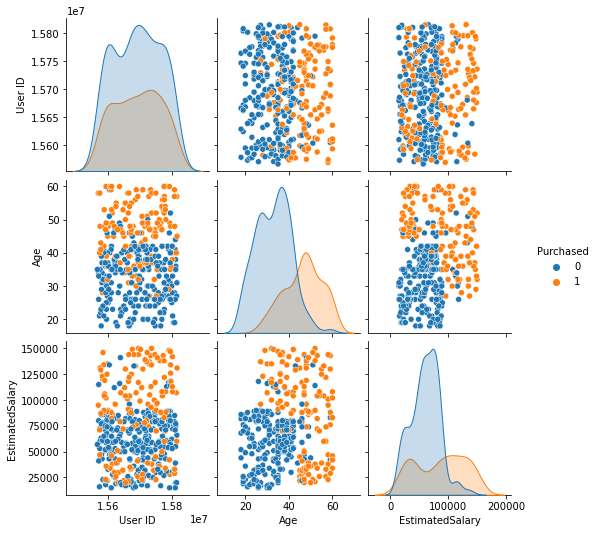

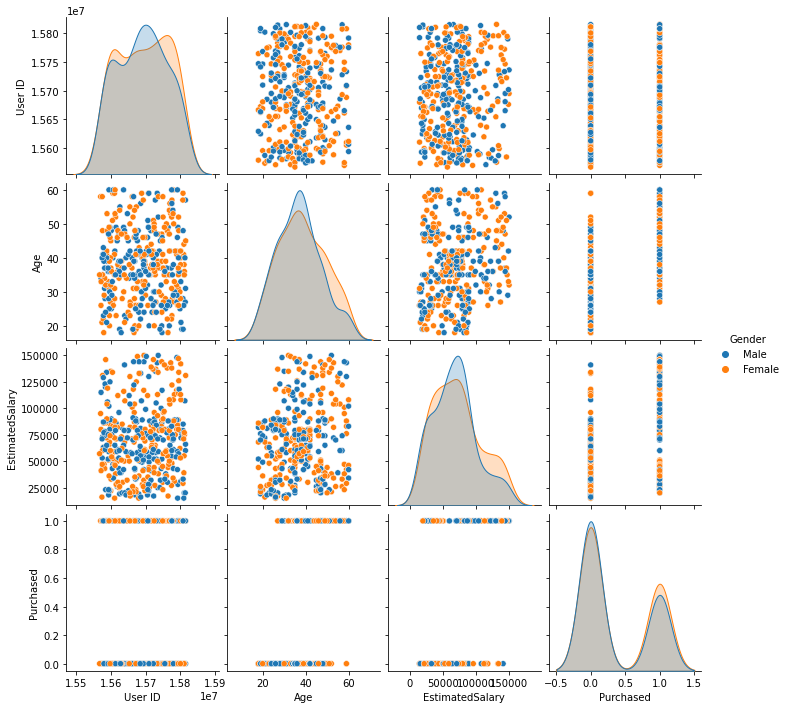

In [9]:
sns.pairplot(social_dataset, diag_kind='kde', hue='Purchased')
sns.pairplot(social_dataset, diag_kind='kde', hue='Gender')

##### Visualize Descriptive Statistics

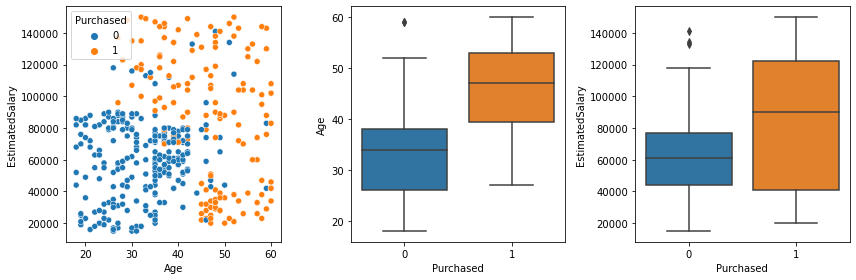

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,4))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=social_dataset,ax=ax1)
sns.boxplot(x='Purchased',y='Age',data=social_dataset,ax=ax2)
sns.boxplot(x='Purchased',y='EstimatedSalary',data=social_dataset,ax=ax3)
plt.tight_layout()

##### encode the qualitative variables

Actually we do not need to encode since the Purchased value is given by 0 or 1.

I encode Gender but it is actually just encode and useless.

In [11]:
social_dataset.Gender =  LabelEncoder().fit_transform(social_dataset.Gender)

##### correlation of variables

In [12]:
social_dataset.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


##### In addition to the code there should be some brief statements of your interpretation of the statistics and the plots. For example, you may notice a non-linear relationship.

According to our statistics and the plots, we can easily see the Age and Purchased is the most corre-lated pairs. The correlation between EstimatedSalary and Purchased is not low as well. And gender's correlation to the remaining is closed to 0, which is irrelevant. In this way, we decide to explore the relationship between Age, EstimatedSalary and Purchased. 

##### split the dataset into training and test sets

In [13]:
X = social_dataset.loc[:,['Age', 'EstimatedSalary']].values.reshape(-1, 2)
y = social_dataset.Purchased.values
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(400, 2) (400,)


((320, 2), (80, 2), (320,), (80,))

##### scale the variables or statement why no need to scale.

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Applying the algorithms

##### create the model and fit to training data

In [15]:
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

##### display the coefficients

In [16]:
print(f'Intercept: {np.round(model.intercept_[0],3)}\nCoefficients:\nAge {np.round(model.coef_[0,0],4)}\nEstimatedSalary {np.round(model.coef_[0, 1], 4)}')

Intercept: -1.121
Coefficients:
Age 2.1807
EstimatedSalary 1.2433


##### Text to interpret the coefficients

One unit increase in Age results in an increase in the log odds of Purchased by 2.1807 units.
One unit increase in EstimatedSalary results in an increase in the log odds of Purchased by 1.2433 units.

##### predict to test set

In [17]:
y_pred = model.predict(X_test)

#### 4. Results

##### display the confusion matrix for the test and the training data

In [18]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Data:")
print(cm)

Confusion Matrix for Test Data:
[[48  3]
 [10 19]]


##### calculate the accuracy, precision,recall and F1 of the test data

##### Accuracy: tp+tn/(tp+tn+fp+fn)

Accuracy is the probability of correct classification

In [19]:
def accuracy(cm):
    return np.trace(cm) / np.sum(cm)

accuracy(cm)

0.8375

##### Precision: tp/(tp+fp)

Precision is the ability of the model not mislabel a true positive. 

In [20]:
def precision(cm):
    return cm[1, 1]/(cm[1, 1] + cm[0, 1])
precision(cm)

0.8636363636363636

##### Recall: tp/(tp+fn)

Recall is the ability of the model to find all positive cases

In [21]:
def recall(cm):
    return cm[1, 1] / (cm[1, 1] + cm[1, 0])
recall(cm)

0.6551724137931034

##### $F_1$ score (also called the F-score)

F_1 is the Harmonic mean of precision and recall. The Harmonic mean is used to average rates.

$$F_1 = \frac{2}{recall^{-1} + precision^{-1}} = \frac{tp}{tp+\frac{1}{2}(fp+fn)}$$

In [22]:
def F1(cm):
    tp, fp, fn = cm[1, 1], cm[0, 1], cm[1, 0]
    return tp/(tp + 1/2 * (fp + fn))
F1(cm)

0.7450980392156863

##### display a ROC curve and calculate the AUC

In [23]:
y_pred_probs = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

roc_auc = auc(fpr, tpr)

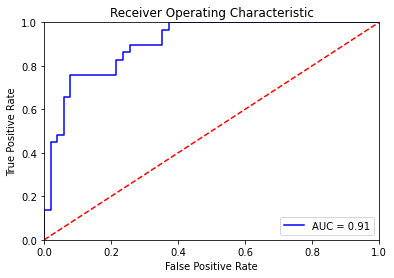

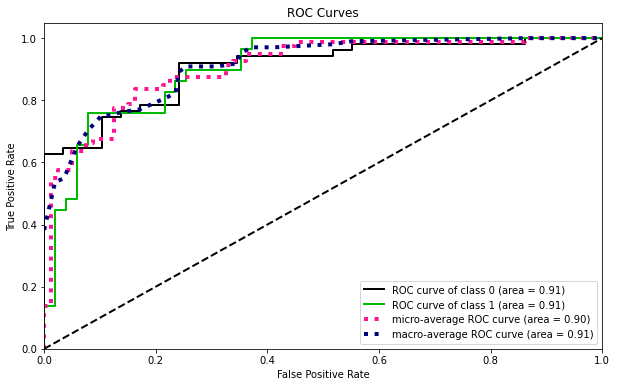

In [24]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, y_pred_probs,figsize=(10,6));

##### Provide an explanation and interpretation of the results

AUC is 0.91, which is excellent result. The upper left corner (0,1) of the ROC graph represents no false negatives (100% sensitivity) and no false positives (100% specificity). 

A random guess would give a point along the dotted diagonal line. 